* Mount Trumbull, AZ, USA
* San Carlos, AZ, USA
* The Thumb, AZ, USA  

# Solve for T, -P and $\mu$ of the invariant point

From the fundamental equation $u(s,v,m_1,...m_k)$ for each phase

\begin{cases} u^{and} = Ts^{and} -Pv^{and} + \mu_{Al_2SiO_5} m^{and} \\ 
              u^{ky} = Ts^{ky} -Pv^{ky} + \mu_{Al_2SiO_5} m^{ky} \\
              u^{sill} = Ts^{sill} -Pv^{sill} + \mu_{Al_2SiO_5} m^{sill}
              \end{cases}

$$
\begin{bmatrix} s^{and} & v^{and} & m^{and}\\ s^{ky} & v^{ky} & m^{ky} \\ s^{sill} & v^{sill} & m^{sill} \end{bmatrix}
\begin{bmatrix} T \\ -P \\ \mu_{Al_2SiO_5} \end{bmatrix} =
\begin{bmatrix} u^{and} \\ u^{ky} \\ u^{sill} \end{bmatrix}
$$

In [1]:
import numpy as np

A = np.array([[251.065,5.19585,1],[241.994,4.45214,1],[253.916,5.01131,1]])
b = np.array([-2330280, -2334497, -2327357])
x = np.linalg.inv(A).dot(b)
print(x)

[ 7.78031632e+02 -3.81939860e+03 -2.50577149e+06]


In [2]:
print(A)

[[251.065     5.19585   1.     ]
 [241.994     4.45214   1.     ]
 [253.916     5.01131   1.     ]]


In [3]:
print(b)

[-2330280 -2334497 -2327357]


# Solving the 3 univariant reactions

In [4]:
import sympy as sp
from sympy.interactive import printing

In [5]:
printing.init_printing(use_latex = True)
u_sill,s_sill,v_sill,m_sill = sp.symbols('u^sill,s^sill,v^sill,m^sill')
u_and, s_and, v_and, m_and  = sp.symbols('u^and ,s^and ,v^and ,m^and')
u_ky, s_ky, v_ky, m_ky  = sp.symbols('u^ky ,s^ky ,v^ky ,m^ky')
T,P,mu = sp.symbols('T,P,mu')

In [6]:
internal_energy_and = sp.Eq(u_and,T*s_and-P*v_and+mu*m_and)
internal_energy_sill = sp.Eq(u_sill,T*s_sill-P*v_sill+mu*m_sill)
internal_energy_ky = sp.Eq(u_ky,T*s_ky-P*v_ky+mu*m_ky)


## andalusite - sillimanite

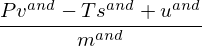

In [7]:
chemical_potential = sp.solve(internal_energy_and,mu)
chemical_potential[0]

In [8]:
sill_and = internal_energy_sill.subs({mu:chemical_potential[0]})

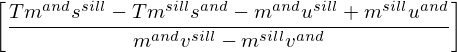

In [9]:
pressure_sill_and = sp.solve(sill_and,P)
pressure_sill_and

In [10]:
pressure_sill_and[0].subs({m_and:1,m_sill:1,s_sill:253.916,s_and:251.065,u_and:-2330280,u_sill:-2327357,v_and:5.19585,v_sill:5.01131})

In [11]:
def sill_and(T):
    return -15.4492251002493*𝑇+15839.3844153029

In [12]:
T = np.linspace(500, 1000, 10, endpoint=True)
sill_and(T)

array([8114.77186518, 7256.48158183, 6398.19129848, 5539.90101514,
       4681.61073179, 3823.32044844, 2965.0301651 , 2106.73988175,
       1248.4495984 ,  390.15931505])

## kyanite - andalusite

In [13]:
ky_and = internal_energy_ky.subs({mu:chemical_potential[0]})
pressure_ky_and = sp.solve(ky_and,P)
pressure_ky_and[0].subs({m_and:1,m_ky:1,s_ky:241.994,s_and:251.065,u_and:-2330280,u_ky:-2334497,v_and:5.19585,v_ky:4.45214})

In [14]:
def ky_and(T):
    return 12.1969584918853*T-5670.22091944441

## kyanite - sillimanite

In [15]:
chemical_potential_2 = sp.solve(internal_energy_sill,mu)
ky_sill = internal_energy_ky.subs({mu:chemical_potential_2[0]})
pressure_ky_sill = sp.solve(ky_sill,P)
pressure_ky_sill[0].subs({m_sill:1,m_ky:1,s_ky:241.994,s_sill:253.916,u_sill:-2327357,u_ky:-2334497,v_sill:5.01131,v_ky:4.45214})

In [16]:
def ky_sill(T):
    return 21.3208863136434*T-12768.9253715328

# Plotting

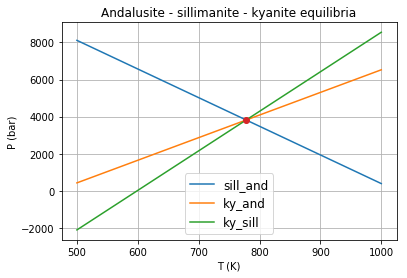

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(T, sill_and(T),label='sill_and')
ax.plot(T, ky_and(T),label='ky_and')
ax.plot(T, ky_sill(T),label='ky_sill')
ax.plot(x[0], -x[1],'o')
ax.legend(loc='best', fontsize=12)

ax.set_xlabel('T (K)')
ax.set_ylabel('P (bar)')
ax.set_title('Andalusite - sillimanite - kyanite equilibria')
ax.grid(True)

# Show the plot
plt.show()